# Analysis of focal point of gaze
not used in thesis

In [1]:
import os
import pandas as pd

conditions = {
    "LipSync": [5, 6, 7, 8, 9],
    "FaceTracking": [1, 2, 3, 4, 10],
}

source = r"C:\Users\alex_\OneDrive - Universität Hamburg\Bachelor\Resultate\GazeTracking\\"

data = []  # All facetracking data
for _, _, files in os.walk(source):
    for f in files:
        df_subj = pd.read_csv(fr"{source}\{f}", sep='\t', names=["collider", "time"])
        name = f.lstrip("subj_").rstrip(".tsv")  # Give dataframe subject id as name
        ts = df_subj["time"].str.replace(',','.').astype(float).values
        s_subj = pd.Series(data=ts, index=df_subj["collider"].values)
        s_subj.name = name
        data.append(s_subj)

len(f"Read {len(data)} data points")

19

In [2]:
data[0]

HeadCollider (UnityEngine.Transform)             363.112900
TorsoCollider (UnityEngine.Transform)             49.299820
UpperLeftArmCollider (UnityEngine.Transform)       7.699995
LowerLeftArmCollider (UnityEngine.Transform)      11.400010
LowerRightArmCollider (UnityEngine.Transform)      2.799999
UpperRightArmCollider (UnityEngine.Transform)      2.799999
Name: 10_1, dtype: float64

In [3]:
s_ls = None
s_ft = None

for s in data:
    if s.index.isnull().any():
        continue
    name = s.name.split('_')[0]
    if int(name) in conditions["LipSync"]:
        if not isinstance(s_ls, pd.Series):
            s_ls = s
        else:
            s_ls += s
    if int(name) in conditions["FaceTracking"]:
        if not isinstance(s_ft, pd.Series):
            s_ft = s
        else:
            s_ft += s

s_ls /= s_ls.sum()
s_ft /= s_ft.sum()
s_ls.name = "LipSync"
s_ft.name = "FaceTracking"

df_sorted = pd.DataFrame(data=[s_ls, s_ft]).transpose().sort_values(by="FaceTracking")
df_sorted.index = df_sorted.index.str.replace("\(UnityEngine.Transform\)", "")
s_ls = df_sorted["LipSync"]
s_ft = df_sorted["FaceTracking"]

s_ls.name = "LipSync"
s_ft.name = "FaceTracking"

s_ls, s_ft

C:\Users\alex_\AppData\Local\Temp/ipykernel_15488/3964475515.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted.index = df_sorted.index.str.replace("\(UnityEngine.Transform\)", "")


(UpperRightArmCollider     0.009962
 LowerRightArmCollider     0.018609
 UpperLeftArmCollider           NaN
 TorsoCollider             0.209114
 HeadCollider              0.741262
 LowerLeftArmCollider      0.021053
 Name: LipSync, dtype: float64,
 UpperRightArmCollider     0.016739
 LowerRightArmCollider     0.019813
 UpperLeftArmCollider      0.027329
 TorsoCollider             0.399521
 HeadCollider              0.536598
 LowerLeftArmCollider           NaN
 Name: FaceTracking, dtype: float64)

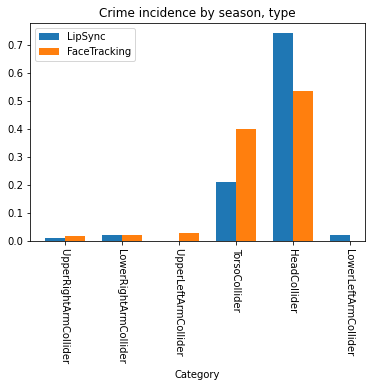

In [4]:
import matplotlib.pyplot as plt
import numpy as np

index = np.arange(6)
bar_width = 0.35

fig, ax = plt.subplots()

ls_plot = ax.bar(index, s_ls, bar_width,
                 label="LipSync")

ft_plot = ax.bar(index+bar_width, s_ft, bar_width,
                 label="FaceTracking")

ax.set_xlabel('Category')
ax.set_title('Crime incidence by season, type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(s_ls.index, rotation=-90)
ax.legend()

plt.show()